In [96]:
import warnings
import pandas as pd
import seaborn as sns
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)


In [99]:
#Importing data set
df = pd.read_csv("C:/Users/Freddy/Desktop/DATA SCIENCE/Housing.csv")

1. I will do some cleaning of the data.
2. I do some EDA where I will some descriptive DA
3. I will then check to see the relationships between price of the houses and the various features of the houses
4. I will then do some predictive analysis of certain house types.

<h4>Doing some data wrangling

In [100]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [102]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [103]:
df.shape

(545, 13)

<h4>Exploratory Data Analysis (EDA)


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [105]:
df[["price", "area"]].describe()

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


In [106]:
#Converting from sqft to sqm of area
df["area_m2"] = (df["area"] / 3.28).round(2)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_m2
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,2262.20
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,2731.71
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,3036.59
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,2286.59
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,2262.20


In [107]:
df.drop(columns="area", inplace=True )
df.head()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_m2
0,13300000,4,2,3,yes,no,no,no,yes,2,yes,furnished,2262.20
1,12250000,4,4,4,yes,no,no,no,yes,3,no,furnished,2731.71
2,12250000,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,3036.59
3,12215000,4,2,2,yes,no,yes,no,yes,3,yes,furnished,2286.59
4,11410000,4,1,2,yes,yes,yes,no,yes,2,no,furnished,2262.20


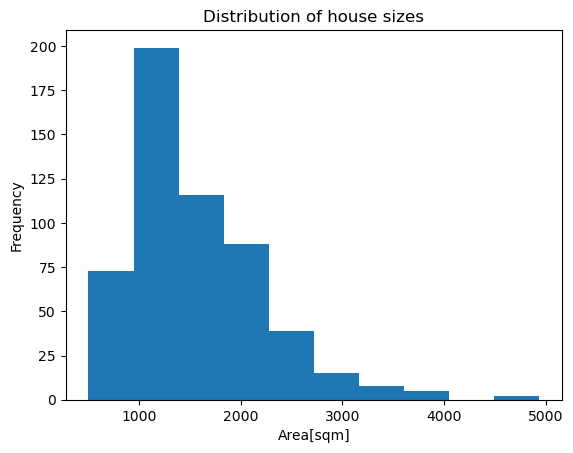

In [108]:
#I want to see the distribution of home sizes

plt.hist(df["area_m2"])
plt.xlabel("Area[sqm]")
plt.ylabel("Frequency")
plt.title("Distribution of house sizes");

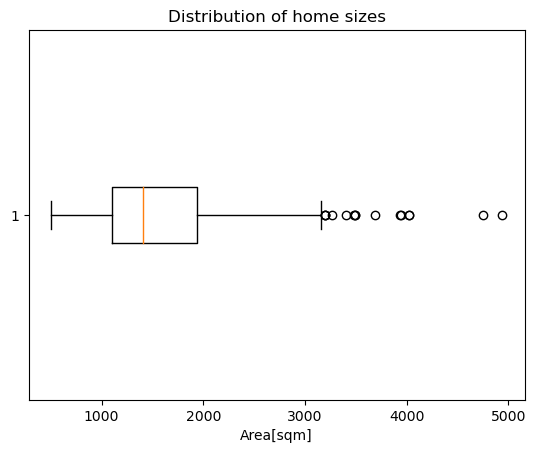

In [109]:
#Checking if there are any outliers

plt.boxplot(df["area_m2"], vert = False)
plt.xlabel("Area[sqm]")
plt.title("Distribution of home sizes");

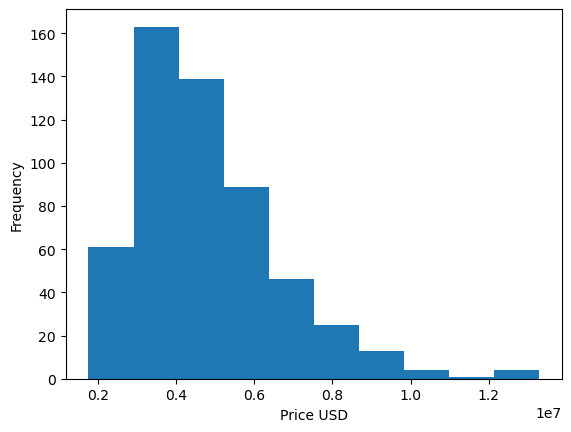

In [110]:
#Looking at the price distribution of home prices
plt.hist(df["price"])
plt.xlabel("Price USD")
plt.ylabel("Frequency");

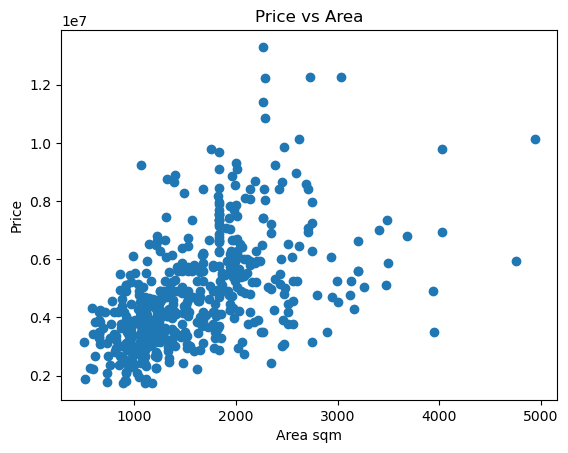

In [111]:
#CHecking if there is any correlation between price and area

plt.scatter(x=df["area_m2"], y=df["price"])
plt.xlabel("Area sqm")
plt.ylabel("Price")
plt.title("Price vs Area");

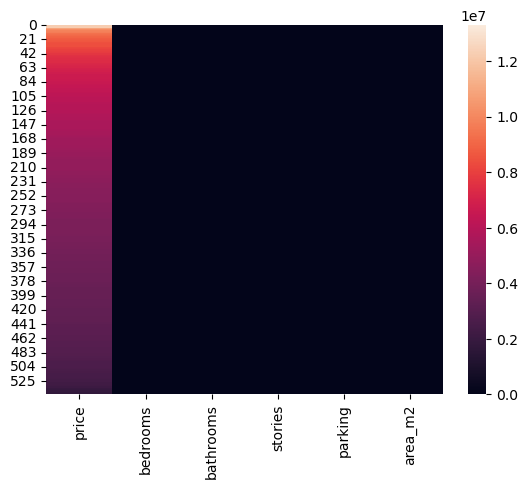

In [113]:
corr = df.select_dtypes("number")
sns.heatmap(corr);

<h2>Now working on the predictions

<h3>Spliting the data

In [115]:
target = "price"
features = ["bedrooms","bathrooms","stories","parking","area_m2"]
            
X_train = df[features]
y_train = df[target]

<h3>Building the Model

In [116]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print("Mean house price:", round(y_mean,2))

print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

Mean house price: 4766729.25
Baseline MAE: 1440702.9248043096


<h3>Itrerating

In [117]:
model = make_pipeline(
    SimpleImputer(),
    Ridge()
)
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

<h3>Evaluating 

In [118]:
y_pred_training = model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_baseline))

Training MAE: 1440702.9248043096


<h3>Communicating the data

In [119]:
def make_prediction(bedrooms,bathrooms,stories,parking,area_m2):
    
    data={
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "stories": stories,
        "parking": parking,
        "area": area_m2
        
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round()[0]
    return f"Predicted house price: ${prediction}"

In [120]:
interact(
    make_prediction,
    area_m2=IntSlider(
        min=X_train["area_m2"].min(),
        max=X_train["area_m2"].max(),
        value=X_train["area_m2"].mean(),
    ),
    bedrooms=FloatSlider(
        min=X_train["bedrooms"].min(),
        max=X_train["bedrooms"].max(),
        value=X_train["bedrooms"].mean(),
    ),
     bathrooms=FloatSlider(
        min=X_train["bathrooms"].min(),
        max=X_train["bathrooms"].max(),
        value=X_train["bathrooms"].mean(),
     ),
     stories=FloatSlider(
        min=X_train["stories"].min(),
        max=X_train["stories"].max(),
        value=X_train["stories"].mean(),
     ),
     parking=FloatSlider(
        min=X_train["parking"].min(),
        max=X_train["parking"].max(),
        value=X_train["parking"].mean(),
     ),
    
    
);

interactive(children=(FloatSlider(value=2.9651376146788992, description='bedrooms', max=6.0, min=1.0), FloatSl…

<h2>Done!!